# Datathon_Proyecto_Establecimientos_Educativos

**Proyecto Análisis de datos.**

*  **Titulo:** Inclusión Educativa en Colombia: Análisis de la Capacidad Institucional para Atender a Estudiantes con Discapacidad en Contextos Rurales y Urbanos.

* **Descripción del reto:** Proyecto de análisis exploratorio cuyo proposito es aplicar todas las etapas del analisis de datos, desde la limpieza hasta la visualización de resultados, la aplicación de metodologías agiles, trabajo colaborativo y aplicación de modelos de aprendizaje automatico supervisado.

* **Hipótesis:** “Las instituciones educativas en zonas urbanas están mejor preparadas para atender a estudiantes con discapacidad que las rurales.”

* **Hipótesis Nula (H₀):**
No hay diferencia significativa en la preparación para atender a estudiantes con discapacidad entre instituciones educativas urbanas y rurales.

* **Hipótesis Alternativa (H₁):**
“Existe una diferencia significativa en la preparación para atender a estudiantes con discapacidad entre instituciones urbanas y rurales.”

---
# **Proceso ETL** (Extract, Transform and Load)

---
## 1. ***"E"*** (Extract)

Importar bibliotecas necesarias

In [ ]:
# Importar librerías para análisis
import pandas as pd
import numpy as np

# Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)

# Configuración de estilo
sns.set(style="darkgrid")

Validacion de ruta

In [ ]:
import os

# Mostrar ruta actual
print("Directorio actual:", os.getcwd())

Directorio actual: /content


Cargar el archivo - Examinar Dataset

In [ ]:
# Nombre del archivo (mismo directorio)

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

ruta = '/content/drive/MyDrive/DATASET_LIMPIO_DATATHON_1.0 - DISCAPACIDADES DEPURADAS_v1.xlsx'
#df = pd.read_excel(file_path)


# Verificar si el archivo existe
import os
if not os.path.exists(ruta):
    print(f"Error: File not found at {ruta}")
else:
    # Ver hojas disponibles
    excel_file = pd.ExcelFile(ruta)
    print("Hojas disponibles:", excel_file.sheet_names)

    # Cargar la primera hoja del archivo
    df = pd.read_excel(excel_file, sheet_name=0)

    # Mostrar primeras filas
    display(df.head())

Mounted at /content/drive
Hojas disponibles: ['DATA_PRINCIPAL', 'ESTRATO', 'CONCATENA', 'DISCAPACIDADES NO BORRAR', 'FORMULA NO BORRAR', 'ESTRATO FORMULA']


,AÑO,SECRETARÍA,CODIGO_DEPARTAMENTO,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,CODIGO_ESTABLECIMIENTO,NOMBRE_ESTABLECIMIENTO,ZONA,DIRECCIÓN,TELÉFONO,NOMBRE_RECTOR,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,GRADOS,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,IDIOMAS,NUMERO_DE_SEDES,PRESTADOR_DE_SERVICIO,PROPIEDAD_PLANTA_FISICA,RESGUARDO,MATRICULA_CONTRATADA,CALENDARIO,INTERNADO,ESTRATO_SOCIO_ECONÓMICO,CORREO_ELECTRÓNICO
0,2016,BUCARAMANGA,68,SANTANDER,68001,BUCARAMANGA,368001000290,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,CLL 8 NO 22-57,6714515,JOSE LUIS CORTES PALOMINO,INSTITUCION EDUCATIVA,NaN,"MEDIA,BÁSICA SECUNDARIA","MAÑANA,NOCTURNA",ACADÉMICA,"6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
1,2016,BUCARAMANGA,68,SANTANDER,68001,BUCARAMANGA,368001000907,COL ATENAS ...,URBANA,CR 26 NO 33-73,64510926454952,NELLY RIVEROS LONDOÑO,INSTITUCION EDUCATIVA,NaN,MEDIA,FIN DE SEMANA,ACADÉMICA,10.11,EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,...
2,2016,NORTE SANTANDER,54,NORTE DE SANTANDER,54874,VILLA DEL ROSARIO,354874000619,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,CLL 6 8-48 B.GRAMALOTE,5707048,FRANCISCO ANTONIO PANQUEVA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,-
3,2016,NORTE SANTANDER,54,NORTE DE SANTANDER,54874,VILLA DEL ROSARIO,354874000830,COL MIXTO SANTISIMA TRINIDAD,URBANA,CR 6 5-32 CENTRO,5701060,ANA BEATRIZ DAZA VERA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,"-2,-1,0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,-
4,2016,NORTE SANTANDER,54,NORTE DE SANTANDER,54405,LOS PATIOS,254405000409,COL DE BTO CIAL ISABEL LA CATOLICA,URBANA,AV 4 32 18 BARRIO CORDIALIDAD,5808460,ROSA STELLA LADINO,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,TARDE",ACADÉMICA,"0,1,2,3,4,5,6,7,8,9,10,11",EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,-


Motivación del Análisis

El presente análisis tiene como objetivo identificar si las instituciones educativas en zonas urbanas están mejor preparadas para atender a estudiantes con discapacidad que las zonas rurales.

Este estudio se basa en preguntas como:

•	Hay mayor presencia de atención a discapacidad en zonas urbanas.
•	Las instituciones rurales carecen de infraestructura o programas para estudiantes con discapacidad.
•	Hay diferencias por tipo de prestador (gobierno, comunidad religiosa, etc.)

Revision de  Dataset

Validaciòn de Contenido

In [ ]:
# Cargar las hojas específicas
df_DATA_PRINCIPAL = pd.read_excel(ruta, sheet_name='DATA_PRINCIPAL')
df_CONCATENA = pd.read_excel(ruta, sheet_name='CONCATENA')
df_ESTRATO = pd.read_excel(ruta, sheet_name='ESTRATO')

# Verificar contenido
print(df_DATA_PRINCIPAL.shape)
print(df_CONCATENA.shape)
print(df_ESTRATO.shape)

# Primeras filas del Dataset
df_DATA_PRINCIPAL.head()
df_CONCATENA.head()
df_ESTRATO.head()


(22530, 31)
(22530, 22)
(22530, 7)


,CODIGO_ESTABLECIMIENTO,ESTRATO 1,ESTRATO 2,ESTRATO 3,ESTRATO 4,ESTRATO 5,ESTRATO 6
0,368001000290,0,0,0,0,0,0
1,368001006298,0,0,0,0,0,0
2,368001000907,0,0,0,0,0,0
3,368077000264,0,0,0,0,0,0
4,354874000619,0,0,0,0,0,0


**Carga de datos desde un archivo Excel con múltiples hojas:**

pd.read_excel() se usa para leer datos desde un archivo Excel.

El parámetro sheet_name permite especificar qué hoja leer.

En este caso, se están leyendo tres hojas diferentes:

DATA_PRINCIPAL: Contiene la base principal con las variables institucionales.

CONCATENA: Contiene los datos de las discapacidades.

ESTRATO: Contiene información sobre clasificación socioeconómica de los tipos de establecimientos educativos.

**Verificación de dimensiones:**

.shape muestra el número de filas y columnas de cada DataFrame.

Esto permite verificar rápidamente si se cargaron correctamente y cuántos registros hay en cada uno.

**Visualización inicial de los datos:**

.head() muestra las primeras 5 filas de cada DataFrame.

Sirve para explorar rápidamente cómo están estructurados los datos, qué columnas hay, si hay valores nulos o inconsistencias.

Union de DataFrames

In [ ]:
# Union de DataFrames - Unión horizontal
df_unido = pd.concat([df_DATA_PRINCIPAL, df_CONCATENA,df_ESTRATO], axis=1)

# Primeras filas y columnas
df_unido.head()
df_unido.columns
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   AÑO                                   22530 non-null  int64 
 1   SECRETARÍA                            22530 non-null  object
 2   CODIGO_DEPARTAMENTO                   22530 non-null  int64 
 3   NOMBRE_DEPARTAMENTO                   22530 non-null  object
 4   CODIGO_MUNICIPIO                      22530 non-null  int64 
 5   NOMBRE_MUNICIPIO                      22530 non-null  object
 6   CODIGO_ESTABLECIMIENTO                22530 non-null  int64 
 7   NOMBRE_ESTABLECIMIENTO                22530 non-null  object
 8   ZONA                                  22528 non-null  object
 9   DIRECCIÓN                             22530 non-null  object
 10  TELÉFONO                              20298 non-null  object
 11  NOMBRE_RECTOR               

**Explicación y propósito:**
**Unión horizontal de DataFrames:**

pd.concat(..., axis=1) concatena varios DataFrames por columnas, es decir, une horizontalmente.

Esto se usa cuando cada DataFrame tiene la misma cantidad de filas (o están en el mismo orden) y se quiere combinarlos en uno solo para trabajar más fácilmente.

En este caso, se esta unificando los datos de las hojas: DATA_PRINCIPAL, CONCATENA y ESTRATO, ya que cada una contiene diferentes atributos de la misma institución educativa.

**Inspección inicial del DataFrame resultante (df_unido):**

df_unido.head() muestra las primeras filas del nuevo DataFrame combinado.

df_unido.columns muestra los nombres de todas las columnas unidas.

df_unido.info() da un resumen general: número de columnas, tipos de datos, cantidad de valores nulos, etc. Esto es clave antes de hacer limpieza o análisis.

---
## 2. ***"T"*** (Transform)

PROCESO LIMPIEZA DE DATOS

Durante el proceso de análisis, se realizaron las siguientes transformaciones y limpiezas sobre el conjunto de datos para garantizar la calidad y coherencia de la información:
### ✔ Identificaciòn y eliminacion de valores duplicados
### ✔ Identificaciòn valores nulos
### ✔ Creación o eliminacion de nuevas columnas
### ✔ Cambio de formato de variables

Identificaciòn Valores Duplicados

In [ ]:
# Revisión de registros duplicados en el DataFrame combinado.
# Esto nos permite verificar si hay filas exactamente iguales que podrían distorsionar el análisis.
# Un valor distinto de cero indicaría que hay datos repetidos que deben ser tratados o eliminados.

df_unido.duplicated().sum()


np.int64(0)

Identificaciòn Valores NULL

In [ ]:
# Conteo de valores nulos por columna
df_unido.isna().sum()

,0
AÑO,0
SECRETARÍA,0
CODIGO_DEPARTAMENTO,0
NOMBRE_DEPARTAMENTO,0
CODIGO_MUNICIPIO,0
NOMBRE_MUNICIPIO,0
CODIGO_ESTABLECIMIENTO,0
NOMBRE_ESTABLECIMIENTO,0
ZONA,2
DIRECCIÓN,0


Manejo de Valores Nullos

In [ ]:
# Rellenar nulos con un valor

# Columna Zona
print(df_unido['ZONA'].isna().sum())
df_unido['ZONA'] = df_unido['ZONA'].fillna('URBANA')
print(df_unido['ZONA'].isna().sum())

# Columna Nombre Rector
print(df_unido['NOMBRE_RECTOR'].isna().sum())
df_unido['NOMBRE_RECTOR'] = df_unido['NOMBRE_RECTOR'].fillna('NO REPORTADO')
print(df_unido['NOMBRE_RECTOR'].isna().sum())

2
0
20
0


### Eliminación de columnas innecesarias

In [ ]:
try:
    df_unido = pd.read_csv('your_dataset.csv')
except FileNotFoundError:
    print("Error: 'your_dataset.csv' not found. Please replace with the correct file path.")

    pass

# Eliminar columna innecesaria
columns_to_drop = ['CORREO_ELECTRÓNICO', 'TELÉFONO', 'GRADOS', 'NOMBRE_RECTOR']
existing_columns = [col for col in columns_to_drop if col in df_unido.columns]
df_unido.drop(columns=existing_columns, inplace=True)

Error: 'your_dataset.csv' not found. Please replace with the correct file path.


En este bloque se realiza la carga del conjunto de datos desde un archivo xlx hacia el DataFrame df_unido.

Para garantizar robustez en la ejecución, se incluye una estructura try-except que captura el error en caso de que el archivo no se encuentre en la ruta especificada, lo cual permite advertir al usuario sobre la necesidad de corregir la ubicación del archivo.

A continuación, se procede a eliminar columnas consideradas innecesarias para el análisis: 'CORREO_ELECTRÓNICO', 'TELÉFONO', 'GRADOS' y 'NOMBRE_RECTOR'. Estas variables, aunque informativas, no aportan valor significativo al enfoque analítico del proyecto o pueden representar datos sensibles que no se desean procesar.

Antes de eliminar, se verifica que dichas columnas existan en el DataFrame mediante una validación condicional para evitar errores en caso de que alguna no esté presente.

Esta depuración contribuye a mantener un conjunto de datos más limpio, enfocado y manejable para los análisis posteriores.



### Creación de Columnas

In [ ]:
# Renombrar columnas
# df_unido.columns = df_unido.columns.str.strip().str.lower().str.replace(" ", "_")
# df_unido = df_unido.rename(columns={'Nombre Completo': 'nombre_completo'})

In [ ]:
# Nombre de las columnas
print(df_unido.columns.tolist())
df_unido.sample(5)

['AÑO', 'SECRETARÍA', 'CODIGO_DEPARTAMENTO', 'NOMBRE_DEPARTAMENTO', 'CODIGO_MUNICIPIO', 'NOMBRE_MUNICIPIO', 'CODIGO_ESTABLECIMIENTO', 'NOMBRE_ESTABLECIMIENTO', 'ZONA', 'DIRECCIÓN', 'TIPO_ESTABLECIMIENTO', 'ETNIAS', 'NIVELES', 'JORNADAS', 'ESPECIALIDAD', 'MODELOS_EDUCATIVOS', 'CAPACIDADES_EXCEPCIONALES', 'DISCAPACIDADES', 'IDIOMAS', 'NUMERO_DE_SEDES', 'PRESTADOR_DE_SERVICIO', 'PROPIEDAD_PLANTA_FISICA', 'RESGUARDO', 'MATRICULA_CONTRATADA', 'CALENDARIO', 'INTERNADO', 'ESTRATO_SOCIO_ECONÓMICO', 'CODIGO_ESTABLECIMIENTO', 'DI-COGNITIVO', 'ENANISMO', 'HIPOACUSIA O BAJA AUDICIÓN', 'LESIÓN NEUROMUSCULAR', 'LIMITACIÓN FISICA (MOVILIDAD)', 'MÚLTIPLE DISCAPACIDAD', 'NO APLICA', 'OTRA DISCAPACIDAD', 'PARALISIS CEREBRAL', 'SA-USUARIO DE LSC', 'SÍNDROME DE DOWN', 'SISTÉMICA', 'SORDERA PROFUNDA', 'SORDOCEGUERA', 'SV-BAJA VISIÓN', 'SV-CEGUERA', 'TRANSTORNO DEL ESPECTRO AUTISTA', 'VOZ Y HABLA', 'PSICOSOCIAL', 'SA-USUARIO DE CASTELLANO', 'SUMA TOTAL POR INSTITUCION EDUCATIVA', 'CODIGO_ESTABLECIMIENTO', '

,AÑO,SECRETARÍA,CODIGO_DEPARTAMENTO,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,CODIGO_ESTABLECIMIENTO,NOMBRE_ESTABLECIMIENTO,ZONA,DIRECCIÓN,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,IDIOMAS,NUMERO_DE_SEDES,PRESTADOR_DE_SERVICIO,PROPIEDAD_PLANTA_FISICA,RESGUARDO,MATRICULA_CONTRATADA,CALENDARIO,INTERNADO,ESTRATO_SOCIO_ECONÓMICO,CODIGO_ESTABLECIMIENTO,DI-COGNITIVO,ENANISMO,HIPOACUSIA O BAJA AUDICIÓN,LESIÓN NEUROMUSCULAR,LIMITACIÓN FISICA (MOVILIDAD),MÚLTIPLE DISCAPACIDAD,NO APLICA,OTRA DISCAPACIDAD,PARALISIS CEREBRAL,SA-USUARIO DE LSC,SÍNDROME DE DOWN,SISTÉMICA,SORDERA PROFUNDA,SORDOCEGUERA,SV-BAJA VISIÓN,SV-CEGUERA,TRANSTORNO DEL ESPECTRO AUTISTA,VOZ Y HABLA,PSICOSOCIAL,SA-USUARIO DE CASTELLANO,SUMA TOTAL POR INSTITUCION EDUCATIVA,CODIGO_ESTABLECIMIENTO,ESTRATO 1,ESTRATO 2,ESTRATO 3,ESTRATO 4,ESTRATO 5,ESTRATO 6
909,2016,POPAYAN,19,CAUCA,19001,POPAYÁN,319001004404,BTO FORMAL DE ADULTOS DEL CAUCA,URBANA,CL 34 12 25,CENTRO EDUCATIVO,NO APLICA,"MEDIA,BÁSICA SECUNDARIA","NOCTURNA,FIN DE SEMANA",ACADÉMICA,PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,NaN,NO APLICA,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,OTRO,NaN,NaN,376111001928,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,376111001928,0,0,0,0,0,0
9801,2016,CHÍA,25,CUNDINAMARCA,25175,CHÍA,425175001183,FUND COL SAN JUAN DEL CAMINO ...,URBANA,CL 12 6 17,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",COMPLETA,"NO APLICA,ACADÉMICA",EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,1,FUNDACION O CORPORACIONES,FUNDACION O CORPORACIONES,NO APLICA,NO,B,NaN,NaN,308001078571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,308001078571,0,0,0,0,0,0
11855,2016,SANTANDER,68,SANTANDER,68077,BARBOSA,368077000264,COLEGIO EVANGÉLICO INTERAMERICANO ...,URBANA,CARRERA 10 # 9 - 12,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",COMPLETA,NaN,EDUCACIÓN TRADICIONAL,NaN,"DI-COGNITIVO,SÍNDROME DE DOWN",INGLÉS,1,COMUNIDAD RELIGIOSA,COMUNIDAD RELIGIOSA,NO APLICA,NO,A,NaN,NaN,252079001189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,252079001189,0,0,0,0,0,0
7696,2016,YOPAL,85,CASANARE,85001,YOPAL,285001002923,INSTITUCIÓN EDUCATIVA TÉCNICA AGROPECUARIA EL ...,RURAL,VDA EL TALADRO,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,ÚNICA,FIN DE SEMANA",AGROPECUARIO,"PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,E...",NaN,DI-COGNITIVO,NaN,5,OFICIAL,OFICIAL,NO APLICA,NO,A,INTERNADO,NaN,252250000307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,252250000307,0,0,0,0,0,0
9946,2016,MONTERIA,23,CÓRDOBA,23001,MONTERÍA,323001009633,COLEGIO HUMANISTA EDGAR HERNANDO SANCHEZ DUARTE,URBANA,CL 25 5 18,CENTRO EDUCATIVO,NaN,"MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIMARIA",FIN DE SEMANA,"NO APLICA,ACADÉMICA",PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,ESTRATO 3,311001017841,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,311001017841,0,0,1,0,0,0


### Conversión de Tipos de Datos

Cambio de formato de variables:
Algunas columnas fueron transformadas a formatos adecuados para su análisis:

Conversión de variables categóricas:
Se transformaron columnas como "", "", "Zona" al tipo category.


**Justificación:** Mejora el rendimiento en análisis y reduce el uso de memoria. Estas columnas contienen valores repetitivos y finitos.

In [ ]:
# Esta línea convierte la columna 'AÑO' a un formato de fecha y hora (datetime64[ns]).


df_unido.info()
df_unido['AÑO'] = pd.to_datetime(df_unido['AÑO'], errors='coerce')
df_unido['AÑO'].info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   AÑO                                   22530 non-null  int64 
 1   SECRETARÍA                            22530 non-null  object
 2   CODIGO_DEPARTAMENTO                   22530 non-null  int64 
 3   NOMBRE_DEPARTAMENTO                   22530 non-null  object
 4   CODIGO_MUNICIPIO                      22530 non-null  int64 
 5   NOMBRE_MUNICIPIO                      22530 non-null  object
 6   CODIGO_ESTABLECIMIENTO                22530 non-null  int64 
 7   NOMBRE_ESTABLECIMIENTO                22530 non-null  object
 8   ZONA                                  22530 non-null  object
 9   DIRECCIÓN                             22530 non-null  object
 10  TIPO_ESTABLECIMIENTO                  22530 non-null  object
 11  ETNIAS                      

In [ ]:
# Lista de columnas a convertir a categoría
columnas_categoricas = [
    'SECRETARÍA', 'NOMBRE_DEPARTAMENTO', 'NOMBRE_MUNICIPIO',
    'NOMBRE_ESTABLECIMIENTO', 'DIRECCIÓN',
    'TIPO_ESTABLECIMIENTO', 'ETNIAS', 'NIVELES',
    'JORNADAS', 'ESPECIALIDAD', 'MODELOS_EDUCATIVOS', 'CAPACIDADES_EXCEPCIONALES',
    'PRESTADOR_DE_SERVICIO', 'PROPIEDAD_PLANTA_FISICA', 'PROPIEDAD_PLANTA_FISICA',
    'RESGUARDO', 'MATRICULA_CONTRATADA', 'CALENDARIO', 'INTERNADO', 'ESTRATO_SOCIO_ECONÓMICO', 'IDIOMAS',
    'ZONA','DISCAPACIDADES' ]

# Conversión a tipo category
for col in columnas_categoricas:
    df_unido[col] = df_unido[col].astype('category')

# Verificar los nuevos tipos de datos
print("\nTipos de datos después de la conversión:")
print(df_unido.dtypes)


Tipos de datos después de la conversión:
AÑO                                     datetime64[ns]
SECRETARÍA                                    category
CODIGO_DEPARTAMENTO                              int64
NOMBRE_DEPARTAMENTO                           category
CODIGO_MUNICIPIO                                 int64
NOMBRE_MUNICIPIO                              category
CODIGO_ESTABLECIMIENTO                           int64
NOMBRE_ESTABLECIMIENTO                        category
ZONA                                          category
DIRECCIÓN                                     category
TIPO_ESTABLECIMIENTO                          category
ETNIAS                                        category
NIVELES                                       category
JORNADAS                                      category
ESPECIALIDAD                                  category
MODELOS_EDUCATIVOS                            category
CAPACIDADES_EXCEPCIONALES                     category
DISCAPACIDADES         



Conversión de columnas seleccionadas a tipo 'category' para optimizar el uso de memoria y mejorar el rendimiento, al trabajar con variables categóricas en el DataFrame 'df_unido'.

Esto es especialmente útil cuando las columnas contienen un número limitado de valores únicos.

Se realiza la conversión para las columnas listadas en 'columnas_categoricas'.

Luego se imprime el tipo de dato de cada columna para verificar que la conversión se haya aplicado correctamente.






In [ ]:
#Conteo del numero de sedes por institucion, donde se identifica una institucion con hasta 68 sedes
print(df_unido['NUMERO_DE_SEDES'].min())
print(df_unido['NUMERO_DE_SEDES'].max())

0
68


In [ ]:
 # Se crea un DataFrame con el conteo de instituciones por número de sedes, se identificaron dos instituciones sin otras sedes.
conteo_sedes = df_unido['NUMERO_DE_SEDES'].value_counts().reset_index()

# Renombrar las columnas
conteo_sedes.columns = ['NUMERO_DE_SEDES', 'NUMERO_DE_INSTITUCIONES']

# Ordenar por número de sedes de forma ascendente (opcional)
conteo_sedes = conteo_sedes.sort_values(by='NUMERO_DE_SEDES')

# Mostrar resultado con mensaje
print("Conteo de Instituciones según su número de sedes:")
print(conteo_sedes)

Conteo de Instituciones según su número de sedes:
    NUMERO_DE_SEDES  NUMERO_DE_INSTITUCIONES
36                0                        2
0                 1                    15682
1                 2                     1174
2                 3                     1063
3                 4                      865
4                 5                      669
5                 6                      583
6                 7                      414
7                 8                      376
8                 9                      297
9                10                      243
10               11                      210
11               12                      195
12               13                      143
13               14                       93
15               15                       82
14               16                       85
16               17                       74
17               18                       60
18               19                       52
19   

### Reemplazo de variables en la columna Zona

In [ ]:
# Reemplazo de combinaciones específicas en la columna 'ZONA' por un valor único 'MIXTO'.
# Se detectaron entradas donde la zona aparece combinada como 'URBANA,RURAL' o 'RURAL,URBANA',
# y se unifican bajo la categoría 'MIXTO' para simplificar el análisis y evitar duplicados semánticos.

df_unido['ZONA'] = df_unido['ZONA'].replace(['URBANA,RURAL', 'RURAL,URBANA'], 'MIXTO')

# Conteo actualizado de la frecuencia de cada categoría en la columna 'ZONA'
# para verificar que el reemplazo se aplicó correctamente y observar la distribución resultante.


Zona_counts_actualizado = df_unido['ZONA'].value_counts()
print("Distribución actualizada por Zona:\n", Zona_counts_actualizado)



Distribución actualizada por Zona:
 ZONA
URBANA    14545
RURAL      6798
MIXTO      1187
Name: count, dtype: int64


<ipython-input-19-ec839c9cde72>:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_unido['ZONA'] = df_unido['ZONA'].replace(['URBANA,RURAL', 'RURAL,URBANA'], 'MIXTO')


In [ ]:
# Conteo por zona
Zona_counts = df_unido['ZONA'].value_counts()
print("Distribución por Zona:\n", Zona_counts, "\n")

Distribución por Zona:
 ZONA
URBANA    14545
RURAL      6798
MIXTO      1187
Name: count, dtype: int64 



✔ Filtrado de registros relevantes

✔ Agrupación o agregación de datos

### EDA

### Estadística descriptiva de variables numéricas

In [ ]:
# Estadística descriptiva de variables numéricas
df_unido.describe()

,AÑO,CODIGO_DEPARTAMENTO,CODIGO_MUNICIPIO,CODIGO_ESTABLECIMIENTO,NUMERO_DE_SEDES,CODIGO_ESTABLECIMIENTO,DI-COGNITIVO,ENANISMO,HIPOACUSIA O BAJA AUDICIÓN,LESIÓN NEUROMUSCULAR,LIMITACIÓN FISICA (MOVILIDAD),MÚLTIPLE DISCAPACIDAD,NO APLICA,OTRA DISCAPACIDAD,PARALISIS CEREBRAL,SA-USUARIO DE LSC,SÍNDROME DE DOWN,SISTÉMICA,SORDERA PROFUNDA,SORDOCEGUERA,SV-BAJA VISIÓN,SV-CEGUERA,TRANSTORNO DEL ESPECTRO AUTISTA,VOZ Y HABLA,PSICOSOCIAL,SA-USUARIO DE CASTELLANO,SUMA TOTAL POR INSTITUCION EDUCATIVA,CODIGO_ESTABLECIMIENTO,ESTRATO 1,ESTRATO 2,ESTRATO 3,ESTRATO 4,ESTRATO 5,ESTRATO 6
count,22530,22530.000000,22530.000000,2.253000e+04,22530.000000,2.253000e+04,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,2.253000e+04,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000
mean,1970-01-01 00:00:00.000002016,37.865735,38129.373946,2.851908e+11,2.683622,2.851908e+11,0.084021,0.001731,0.044874,0.048114,0.009854,0.039592,0.018020,0.007989,0.028318,0.001465,0.054461,0.000666,0.037195,0.001332,0.045850,0.022858,0.023613,0.000799,0.000799,0.001598,0.473147,2.851908e+11,0.127075,0.056502,0.029783,0.010519,0.003018,0.002441
min,1970-01-01 00:00:00.000002016,5.000000,5001.000000,1.050010e+11,0.000000,1.050010e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.050010e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1970-01-01 00:00:00.000002016,11.000000,11001.000000,2.238070e+11,1.000000,2.238070e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.238070e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970-01-01 00:00:00.000002016,25.000000,25899.000000,3.080011e+11,1.000000,3.080011e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.080011e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1970-01-01 00:00:00.000002016,66.000000,66001.000000,3.471890e+11,3.000000,3.471890e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.471890e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1970-01-01 00:00:00.000002016,99.000000,99773.000000,8.661700e+11,68.000000,8.661700e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,8.661700e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,26.614388,26623.034552,9.146241e+10,3.765797,9.146241e+10,0.277426,0.041570,0.207031,0.214011,0.098777,0.195002,0.133028,0.089027,0.165883,0.038244,0.226930,0.025795,0.189243,0.036467,0.209164,0.149455,0.151843,0.028255,0.028255,0.039942,1.497957,9.146241e+10,0.333064,0.230895,0.169991,0.102025,0.054856,0.049349


Estadísticas descriptivas de variables numéricas, corresponde a todas las variables numéricas que tenemos en el Dataset
1.	count: Número de valores no nulos en esa columna (todos tienen 22,530).
2.	mean: Promedio o media de los valores.
3.	std: Desviación estándar (qué tanto varían los datos respecto a la media).
4.	min: Valor mínimo.
5.	25%: Primer cuartil (el 25% de los datos está por debajo de este valor).
6.	50% (mediana): El 50% de los datos está por debajo de este valor.
7.	75%: Tercer cuartil (el 75% de los datos está por debajo de este valor).
8.	max: Valor máximo.

**Detalle:**

AÑO: Todos los valores son 2016 (no hay variación, por eso std = 0.0).
CODIGO_DEPARTAMENTO / CODIGO_MUNICIPIO / CODIGO_ESTABLECIMIENTO: Son identificadores numéricos, no tienen un análisis estadístico útil por sí solos, pero: Puedes ver su rango (min a max) y cómo están distribuidos.
Promedio: 2.68 sedes por establecimiento.
Máximo: 68 sedes (valor muy alto que podría ser un outlier).
Mediana (50%): 1 sede (la mayoría tienen pocas sedes).


Condiciones especiales
-	1 significa presencia de la condición.
-	0 significa ausencia.

Análisis de Inclusión – Prevalencia por Tipo de Discapacidad
Tipo de discapacidad o condición	% de inclusión (media)

DI-COGNITIVO	8.4%

SÍNDROME DE DOWN	5.4%

LESIÓN NEUROMUSCULAR	4.8%

SV-BAJA VISIÓN	4.6%

HIPOACUSIA O BAJA AUDICIÓN	4.4%

MÚLTIPLE DISCAPACIDAD	4.0%

SORDERA PROFUNDA	3.7%

PARÁLISIS CEREBRAL	2.8%

TRASTORNO DEL ESPECTRO AUTISTA (TEA)	2.4%

SV-CEGUERA	2.3%

NO APLICA (registro sin condición o desconocida)	1.8%

LIMITACIÓN FÍSICA (MOVILIDAD)	0.98%

OTRA DISCAPACIDAD	0.79%

ENANISMO	0.17%

SA-USUARIO DE CASTELLANO	0.16%

SA-USUARIO DE LSC (lengua de señas colombiana)	0.15%

SORDOCEGUERA	0.13%

VOZ Y HABLA	0.08%

PSICOSOCIAL	0.08%

SISTÉMICA	0.07%






### Estadísticas descriptivas de variables no  numéricas

In [ ]:
# Estadísticas descriptivas de variables no  numéricas
df_unido.describe(exclude=['int64'], include=['object', 'category'])

,SECRETARÍA,NOMBRE_DEPARTAMENTO,NOMBRE_MUNICIPIO,NOMBRE_ESTABLECIMIENTO,ZONA,DIRECCIÓN,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,IDIOMAS,PRESTADOR_DE_SERVICIO,PROPIEDAD_PLANTA_FISICA,RESGUARDO,MATRICULA_CONTRATADA,CALENDARIO,INTERNADO,ESTRATO_SOCIO_ECONÓMICO
count,22530,22530,22530,22530,22530,22530,22530,914,22313,22340,11854,22254,378,3758,3186,22530,22530,22505,22530,22530,1551,4757
unique,95,33,1037,20692,3,21271,2,154,26,59,101,2403,21,496,13,13,14,273,2,3,7,16
top,BOGOTA,VALLE DEL CAUCA,"BOGOTÁ, D.C.",INSTITUTO CORFERRINI,URBANA,CENTRO,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,INGLÉS,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NINGUNO,ESTRATO 1
freq,2404,2485,2404,44,14545,34,11748,249,10380,4174,7453,10516,238,402,2896,10606,10586,21528,20396,21338,1078,2507



**Columnas del DataFrame Estadísticas descriptivas de variables no  numéricas:**

•	SECRETARÍA

•	NOMBRE_DEPARTAMENTO

•	NOMBRE_MUNICIPIO

•	NOMBRE_ESTABLECIMIENTO

•	ZONA

•	DIRECCIÓN

•	NOMBRE_RECTOR

•	TIPO_ESTABLECIMIENTO

**Resumen de las variables**

•	Count: número total de registros no nulos para esa variable.

•	Unique: número de valores únicos distintos en esa columna.

•	Top: el valor más frecuente (la moda) en esa columna.

•	Freq: la frecuencia (cuántas veces aparece) del valor más frecuente (top).







### AGRUPACIÓN DE DATOS ESTABECIMIENTO Y ZONA

In [ ]:
# Mostrar las columnas específicas del DataFrame donde se realiza tabla cruzada
df_unido[['TIPO_ESTABLECIMIENTO', 'ZONA']]

#Combinación de "Nivel de Estudio" y "Situación Laboral",
conteo = df_unido.groupby(['TIPO_ESTABLECIMIENTO', 'ZONA']).size().reset_index(name='Cantidad')
print(conteo)

# con tabla cruzada
tabla_cruzada = pd.crosstab(df_unido['TIPO_ESTABLECIMIENTO'], df_unido['ZONA'])
print(tabla_cruzada)

    TIPO_ESTABLECIMIENTO    ZONA  Cantidad
0       CENTRO EDUCATIVO   RURAL      2824
1       CENTRO EDUCATIVO   MIXTO        15
2       CENTRO EDUCATIVO  URBANA      7943
3  INSTITUCION EDUCATIVA   RURAL      3974
4  INSTITUCION EDUCATIVA   MIXTO      1172
5  INSTITUCION EDUCATIVA  URBANA      6602
ZONA                   RURAL  MIXTO  URBANA
TIPO_ESTABLECIMIENTO                       
CENTRO EDUCATIVO        2824     15    7943
INSTITUCION EDUCATIVA   3974   1172    6602


<ipython-input-23-9fa9eda288ef>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_unido.groupby(['TIPO_ESTABLECIMIENTO', 'ZONA']).size().reset_index(name='Cantidad')


**Este código tabla cruzada:**

Visualizar y analizar la relación entre dos variables categóricas: el tipo de establecimiento y la zona.

Identificar cuántos registros hay para cada combinación de tipo de establecimiento y zona.

Facilitar la interpretación de la distribución conjunta mediante tablas agrupadas y tablas cruzadas.

Ayuda en análisis exploratorios para entender patrones, posibles sesgos o diferencias entre zonas y tipos de establecimientos.

In [ ]:
# Selección de columnas específicas para el análisis:
# La columna 'TIPO_ESTABLECIMIENTO' para agrupar los datos.
# Las columnas de estratos socioeconómicos ('ESTRATO 1' a 'ESTRATO 6') para sumar la cantidad de personas por estrato.

columnas_estrato = ['ESTRATO 1','ESTRATO 2','ESTRATO 3','ESTRATO 4','ESTRATO 5','ESTRATO 6']
columnas = ['TIPO_ESTABLECIMIENTO'] + columnas_estrato
df_seleccionado = df_unido[columnas]

# Agrupación del DataFrame por 'TIPO_ESTABLECIMIENTO' y suma de los valores en cada columna de estrato.
# Esto permite obtener la cantidad total de personas en cada estrato socioeconómico, segmentado por tipo de establecimiento.

tabla_suma_estratos = df_seleccionado.groupby('TIPO_ESTABLECIMIENTO')[columnas_estrato].sum()

# Mostrar la tabla resultante que presenta la sumatoria de personas por estrato en cada tipo de establecimiento,
# facilitando el análisis de la distribución socioeconómica en los diferentes tipos de establecimientos.

print("Sumatoria de personas por tipo de establecimiento y estrato:")
display(tabla_suma_estratos)


Sumatoria de personas por tipo de establecimiento y estrato:


<ipython-input-24-bbfa7ed7c002>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suma_estratos = df_seleccionado.groupby('TIPO_ESTABLECIMIENTO')[columnas_estrato].sum()


,ESTRATO 1,ESTRATO 2,ESTRATO 3,ESTRATO 4,ESTRATO 5,ESTRATO 6
TIPO_ESTABLECIMIENTO,,,,,,
CENTRO EDUCATIVO,836,426,351,125,33,27
INSTITUCION EDUCATIVA,2027,847,320,112,35,28


La tabla muestra la distribución acumulada de personas según estrato socioeconómico en cada tipo de establecimiento.

Este análisis permite identificar qué tipos de establecimientos atienden mayormente a poblaciones de estratos específicos, lo cual es útil para diseñar políticas educativas y sociales más focalizadas.

Por ejemplo, se puede observar si ciertos tipos de establecimientos concentran estudiantes de estratos bajos o altos, lo que puede reflejar diferencias en acceso, calidad o recursos.

Estos hallazgos son clave para orientar intervenciones que busquen mayor equidad en el sistema educativo.

Visualizaciones


Distribución de Discapacidades por Zona:


<ipython-input-25-e0aa24a6a8df>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discapacidad_counts_by_zone = df_discapacidades_por_zona.groupby('ZONA').sum()


        DI-COGNITIVO  ENANISMO  HIPOACUSIA O BAJA AUDICIÓN  \
ZONA                                                         
RURAL            377        15                         154   
MIXTO            180         6                         111   
URBANA          1336        18                         746   

        LESIÓN NEUROMUSCULAR  LIMITACIÓN FISICA (MOVILIDAD)  \
ZONA                                                          
RURAL                    152                             48   
MIXTO                     90                              8   
URBANA                   842                            166   

        MÚLTIPLE DISCAPACIDAD  NO APLICA  OTRA DISCAPACIDAD  \
ZONA                                                          
RURAL                     164         66                 54   
MIXTO                     115         12                 11   
URBANA                    613        328                115   

        PARALISIS CEREBRAL  PSICOSOCIAL  SA-USUARIO DE CA

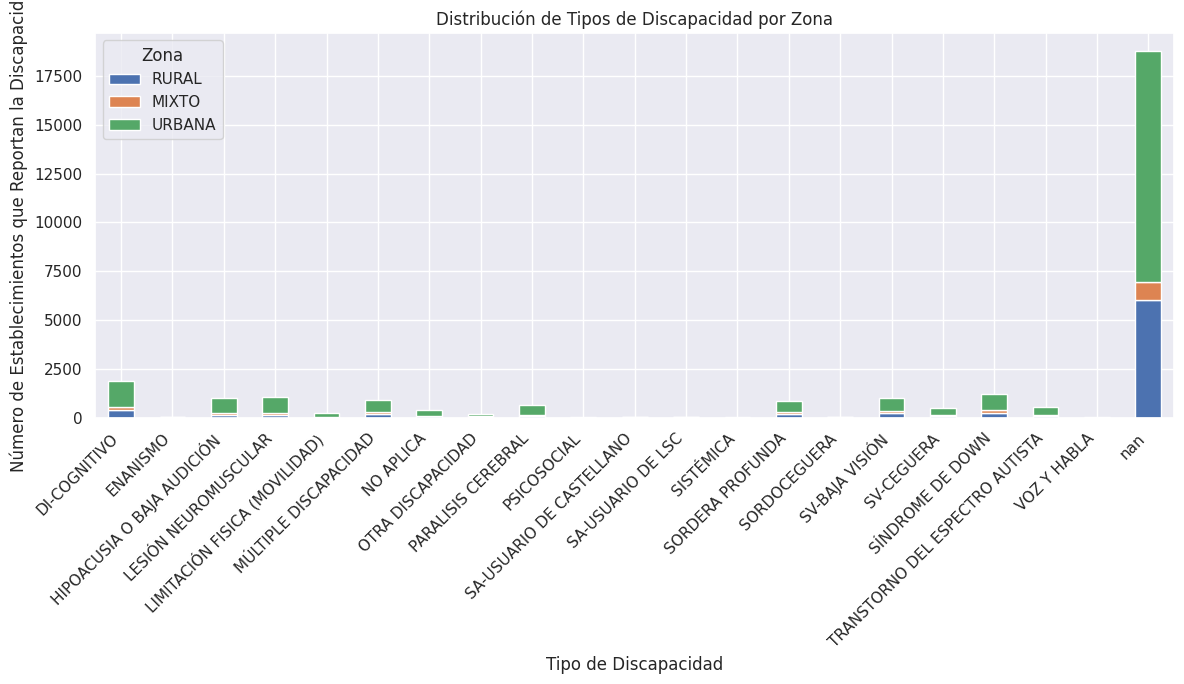


Análisis del Número de Discapacidades Reportadas por Establecimiento y Zona:
        count      mean  median       std
ZONA                                     
RURAL     781  2.526248     2.0  2.731279
MIXTO     268  4.041045     3.0  3.187375
URBANA   2709  2.806940     2.0  2.457920


<ipython-input-25-e0aa24a6a8df>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_unido.groupby('ZONA')['NUM_DISCAPACIDADES_REPORTADAS'].agg(['count', 'mean', 'median', 'std']))


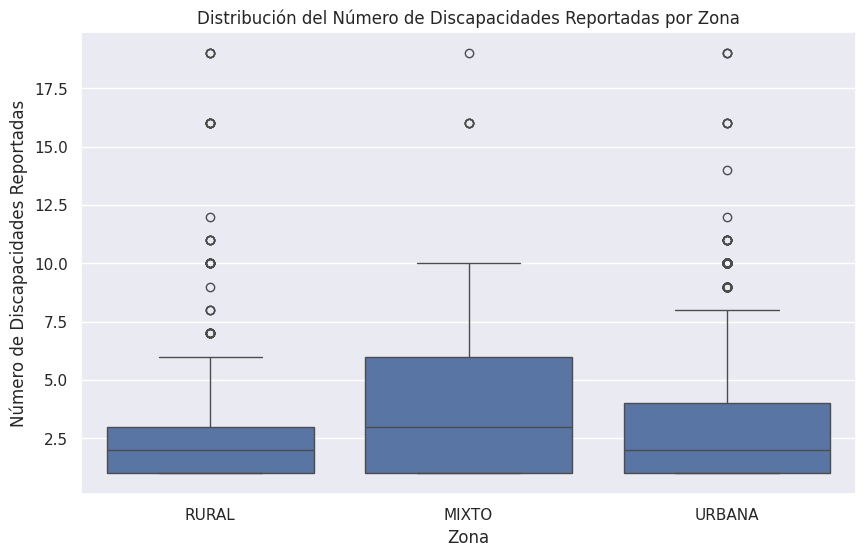

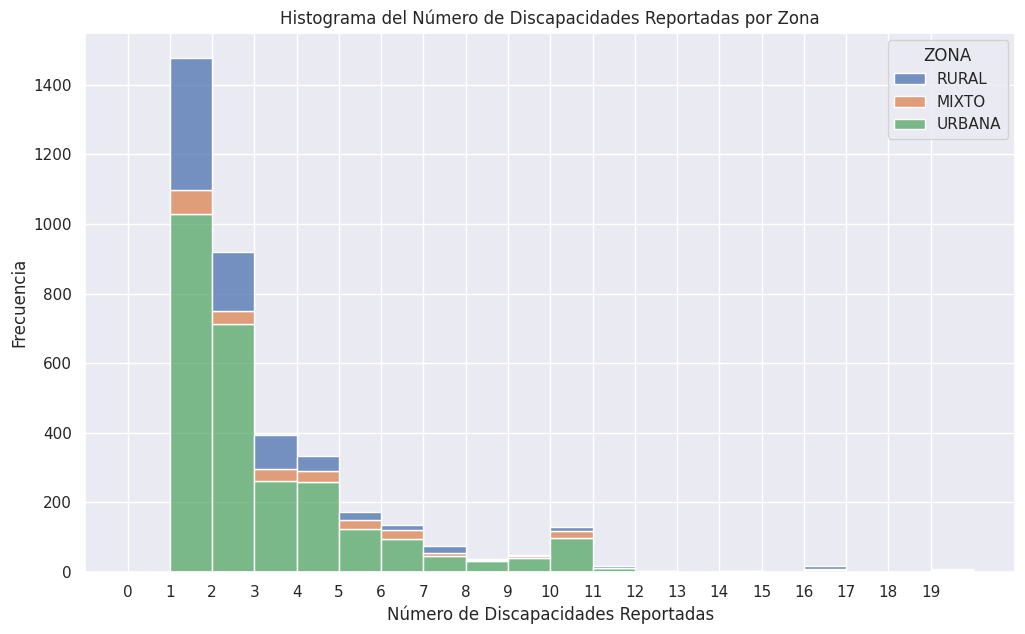


Análisis de la relación entre el Número de Discapacidades Reportadas y otras variables por Zona:

Relación entre el Número de Discapacidades Reportadas y Tipo de Establecimiento por Zona:


<ipython-input-25-e0aa24a6a8df>:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df_unido.groupby(['ZONA', 'TIPO_ESTABLECIMIENTO'])['NUM_DISCAPACIDADES_REPORTADAS'].agg(['count', 'mean', 'median']))


count      mean  median
ZONA   TIPO_ESTABLECIMIENTO                          
RURAL  CENTRO EDUCATIVO          99  2.454545     1.0
       INSTITUCION EDUCATIVA    682  2.536657     2.0
MIXTO  CENTRO EDUCATIVO           0       NaN     NaN
       INSTITUCION EDUCATIVA    268  4.041045     3.0
URBANA CENTRO EDUCATIVO        1052  2.147338     2.0
       INSTITUCION EDUCATIVA   1657  3.225709     2.0

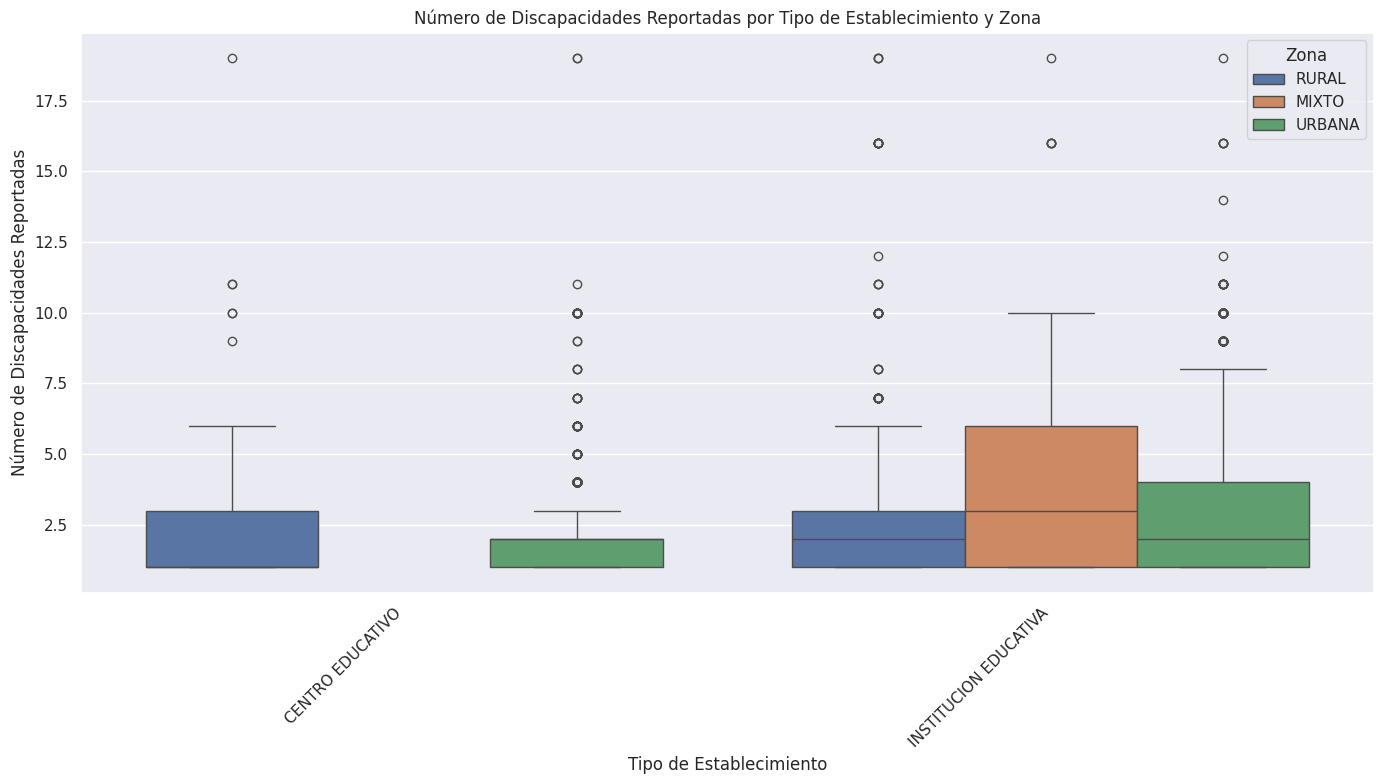


Relación entre el Número de Discapacidades Reportadas y Prestador de Servicio por Zona:


<ipython-input-25-e0aa24a6a8df>:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df_unido.groupby(['ZONA', 'PRESTADOR_DE_SERVICIO'])['NUM_DISCAPACIDADES_REPORTADAS'].agg(['count', 'mean', 'median']))


count      mean  median
ZONA   PRESTADOR_DE_SERVICIO                                 
RURAL  CAJA DE COMPENSACIÓN               0       NaN     NaN
       COMUNIDAD                          0       NaN     NaN
       COMUNIDAD RELIGIOSA                2  1.000000     1.0
       CONCESION                          3  1.333333     1.0
       COOPERATIVO                        1  3.000000     3.0
       EDUCACION MISIONAL CONTRATADA      8  4.500000     4.0
       FEDERACIONES                       1  4.000000     4.0
       FUNDACION O CORPORACIONES          8  2.750000     2.0
       OFICIAL                          706  2.497167     2.0
       PERSONA NATURAL                   51  2.686275     2.0
       REGIMEN ESPECIAL                   1  2.000000     2.0
       SOCIEDAD                           0       NaN     NaN
       UNIVERSIDAD                        0       NaN     NaN
MIXTO  CAJA DE COMPENSACIÓN               0       NaN     NaN
       COMUNIDAD                          0       NaN     NaN
       COMUNIDAD RELIGIOSA                0       NaN     NaN
       CONCESION                          2  2.500000     2.5
       COOPERATIVO                        0       NaN     NaN
       EDUCACION MISIONAL CONTRATADA      3  4.000000     1.0
       FEDERACIONES                       0       NaN     NaN
       FUNDACION O CORPORACIONES          0       NaN     NaN
       OFICIAL                          262  4.064885     3.0
       PERSONA NATURAL                    1  1.000000     1.0
       REGIMEN ESPECIAL                   0       NaN     NaN
       SOCIEDAD                           0       NaN     NaN
       UNIVERSIDAD                        0       NaN     NaN
URBANA CAJA DE COMPENSACIÓN              22  3.045455     2.0
       COMUNIDAD                         10  2.600000     2.0
       COMUNIDAD RELIGIOSA              162  2.277778     2.0
       CONCESION                          3  5.000000     4.0
       COOPERATIVO                       11  2.363636     2.0
       EDUCACION MISIONAL CONTRATADA     10  6.300000     5.0
       FEDERACIONES                      33  3.545455     3.0
       FUNDACION O CORPORACIONES         78  2.897436     2.0
       OFICIAL                          754  3.909814     3.0
       PERSONA NATURAL                 1604  2.307980     2.0
       REGIMEN ESPECIAL                  10  1.700000     1.0
       SOCIEDAD                          12  2.333333     2.5
       UNIVERSIDAD                        0       NaN     NaN

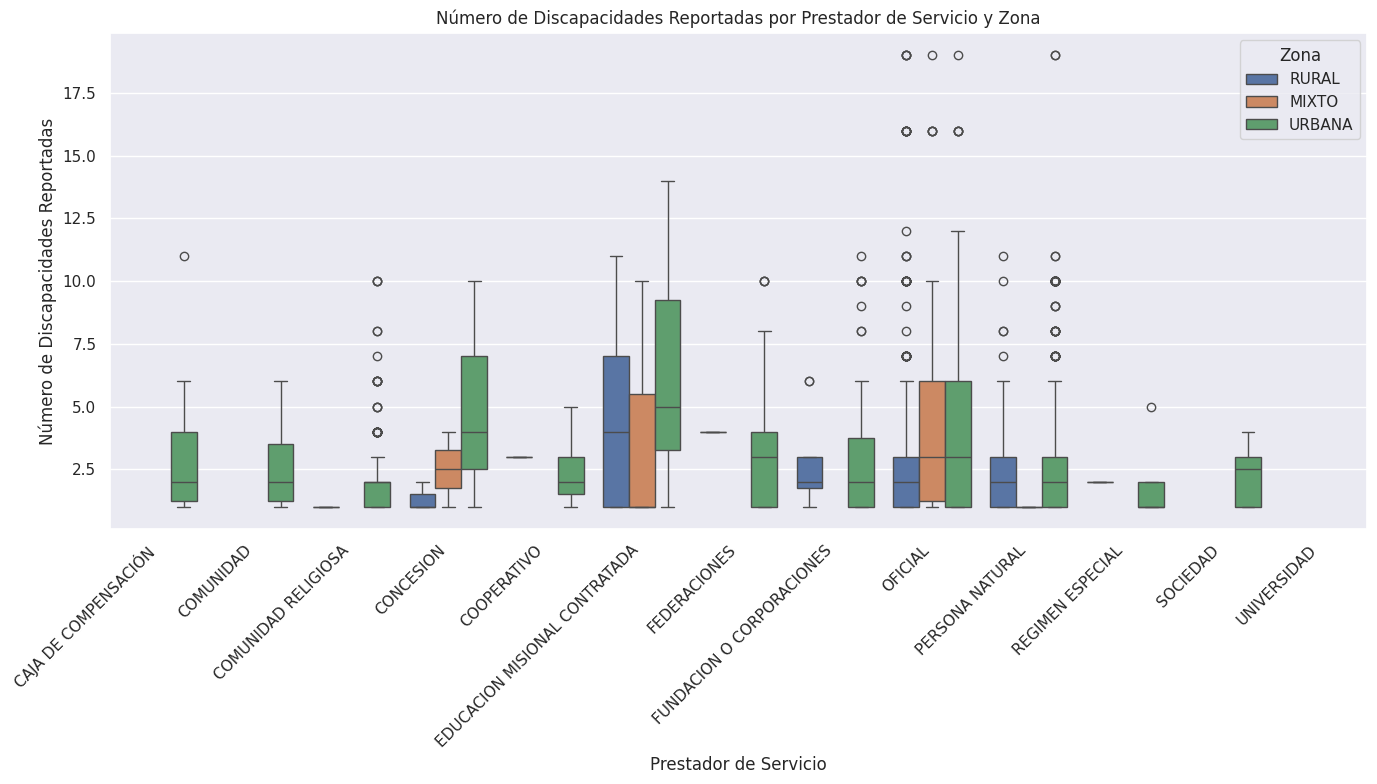

In [ ]:

import matplotlib.pyplot as plt
# Análisis de la Capacidad por Zona y Tipo de Discapacidad

# 1. Distribución de Discapacidades por Zona
print("\nDistribución de Discapacidades por Zona:")
# Desagrupar la columna DISCAPACIDADES si contiene múltiples valores separados por coma
# Esto es necesario si una fila puede tener más de una discapacidad reportada.
# Ajusta el separador (',') si tus datos usan otro.
df_discapacidades_expandidas = df_unido['DISCAPACIDADES'].str.get_dummies(sep=',')
df_discapacidades_por_zona = pd.concat([df_unido['ZONA'], df_discapacidades_expandidas], axis=1)

# Sumar las ocurrencias de cada discapacidad por zona
discapacidad_counts_by_zone = df_discapacidades_por_zona.groupby('ZONA').sum()
print(discapacidad_counts_by_zone)

# Visualización de la distribución de discapacidades por zona
discapacidad_counts_by_zone.T.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribución de Tipos de Discapacidad por Zona')
plt.xlabel('Tipo de Discapacidad')
plt.ylabel('Número de Establecimientos que Reportan la Discapacidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Zona')
plt.tight_layout()
plt.show()


# 2. Contar la Cantidad de Discapacidades Reportadas por Establecimiento y Zona
# Contar el número de discapacidades reportadas por cada establecimiento
# Esto asume que la columna DISCAPACIDADES contiene una cadena con nombres de discapacidades separadas por coma
df_unido['NUM_DISCAPACIDADES_REPORTADAS'] = df_unido['DISCAPACIDADES'].str.split(',').str.len()



print("\nAnálisis del Número de Discapacidades Reportadas por Establecimiento y Zona:")
print(df_unido.groupby('ZONA')['NUM_DISCAPACIDADES_REPORTADAS'].agg(['count', 'mean', 'median', 'std']))

# Visualización de la distribución del número de discapacidades reportadas por zona
plt.figure(figsize=(10, 6))
sns.boxplot(x='ZONA', y='NUM_DISCAPACIDADES_REPORTADAS', data=df_unido)
plt.title('Distribución del Número de Discapacidades Reportadas por Zona')
plt.xlabel('Zona')
plt.ylabel('Número de Discapacidades Reportadas')
plt.show()

plt.figure(figsize=(12, 7))
sns.histplot(data=df_unido, x='NUM_DISCAPACIDADES_REPORTADAS', hue='ZONA', multiple='stack', bins=range(int(df_unido['NUM_DISCAPACIDADES_REPORTADAS'].max()) + 2))
plt.title('Histograma del Número de Discapacidades Reportadas por Zona')
plt.xlabel('Número de Discapacidades Reportadas')
plt.ylabel('Frecuencia')
plt.xticks(range(int(df_unido['NUM_DISCAPACIDADES_REPORTADAS'].max()) + 1))
plt.show()


# 3. Relación entre el Número de Discapacidades Reportadas y otras Variables por Zona
print("\nAnálisis de la relación entre el Número de Discapacidades Reportadas y otras variables por Zona:")

# Ejemplo: Relación con el Tipo de Establecimiento por Zona
print("\nRelación entre el Número de Discapacidades Reportadas y Tipo de Establecimiento por Zona:")
display(df_unido.groupby(['ZONA', 'TIPO_ESTABLECIMIENTO'])['NUM_DISCAPACIDADES_REPORTADAS'].agg(['count', 'mean', 'median']))

# Visualización (ejemplo para Tipo de Establecimiento)
plt.figure(figsize=(14, 8))
sns.boxplot(x='TIPO_ESTABLECIMIENTO', y='NUM_DISCAPACIDADES_REPORTADAS', hue='ZONA', data=df_unido)
plt.title('Número de Discapacidades Reportadas por Tipo de Establecimiento y Zona')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Número de Discapacidades Reportadas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Zona')
plt.tight_layout()
plt.show()

# Puedes repetir este análisis y visualización para otras variables categóricas
# como 'PRESTADOR_DE_SERVICIO' o 'ESTRATO_SOCIO_ECONÓMICO' (si lo tratas como categórico para este análisis).

# Ejemplo: Relación con el Prestador de Servicio por Zona
print("\nRelación entre el Número de Discapacidades Reportadas y Prestador de Servicio por Zona:")
display(df_unido.groupby(['ZONA', 'PRESTADOR_DE_SERVICIO'])['NUM_DISCAPACIDADES_REPORTADAS'].agg(['count', 'mean', 'median']))

# Visualización (ejemplo para Prestador de Servicio)
plt.figure(figsize=(14, 8))
sns.boxplot(x='PRESTADOR_DE_SERVICIO', y='NUM_DISCAPACIDADES_REPORTADAS', hue='ZONA', data=df_unido)
plt.title('Número de Discapacidades Reportadas por Prestador de Servicio y Zona')
plt.xlabel('Prestador de Servicio')
plt.ylabel('Número de Discapacidades Reportadas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Zona')
plt.tight_layout()
plt.show()


**1. Distribución de Discapacidades por Zona**

Este bloque desagrega la columna DISCAPACIDADES para manejar casos donde un establecimiento reporta múltiples discapacidades separadas por comas. Luego, suma cada tipo de discapacidad por zona (urbana, rural, mixta, etc.) y genera una visualización de barras apiladas.

Esto permite observar qué tipos de discapacidades se reportan con mayor frecuencia en cada zona, facilitando la identificación de patrones geográficos en la capacidad institucional para atender distintas discapacidades.

**2. Conteo del Número de Discapacidades Reportadas por Establecimiento y Zona**

Aquí se calcula cuántas discapacidades se reportan en total por cada establecimiento, asumiendo que la columna DISCAPACIDADES puede contener múltiples valores separados por comas.

Se presentan estadísticas descriptivas (cantidad, media, mediana, desviación estándar) agrupadas por zona, y se visualiza la distribución con diagramas de caja y histogramas.

Esto ayuda a entender la variabilidad en la cantidad de discapacidades atendidas por zona y detectar posibles diferencias en la complejidad o diversidad de necesidades entre establecimientos según su ubicación.

**3. Relación entre Número de Discapacidades Reportadas y otras Variables por Zona**

En este último bloque se explora la relación entre el número de discapacidades reportadas y variables categóricas relevantes, como el tipo de establecimiento y el prestador de servicio, desglosadas por zona.

Se calculan estadísticas agrupadas y se generan visualizaciones con diagramas de caja para comparar cómo varía el número de discapacidades reportadas entre categorías y zonas.

Este análisis permite identificar si ciertos tipos de establecimientos o prestadores atienden a estudiantes con más discapacidades, y si esta dinámica cambia según la zona, lo que es clave para evaluar la capacidad institucional y focalizar intervenciones.



---
## 3. ***"L"*** (Load)

In [ ]:
# Guardar el dataframe limpio como CSV
archivo_procesado = 'DATASET_FINAL_ESTABLECIMIENTOS-EDUCATIVOS-COLOMBIA_DISCAPACIDADES.xlsx'
df_unido.to_excel(archivo_procesado, index=False)

print(f'El conjunto de datos luego del procesamiento fue almacenado en la ruta:\n\t{archivo_procesado}')

El conjunto de datos luego del procesamiento fue almacenado en la ruta:
	DATASET_FINAL_ESTABLECIMIENTOS-EDUCATIVOS-COLOMBIA_DISCAPACIDADES.xlsx


---
# Análisis predictivo